In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Vivekfreak/Datasets/main/Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## EDA

In [3]:
df['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [4]:
df['type'].nunique()

7

In [5]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
df['breathes'].mean()

0.7920792079207921

In [8]:
df['breathes'].replace(0,df['breathes'].mean())

0      1.000000
1      1.000000
2      0.792079
3      1.000000
4      1.000000
         ...   
96     1.000000
97     1.000000
98     1.000000
99     1.000000
100    1.000000
Name: breathes, Length: 101, dtype: float64

In [9]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Histogram of Classes')

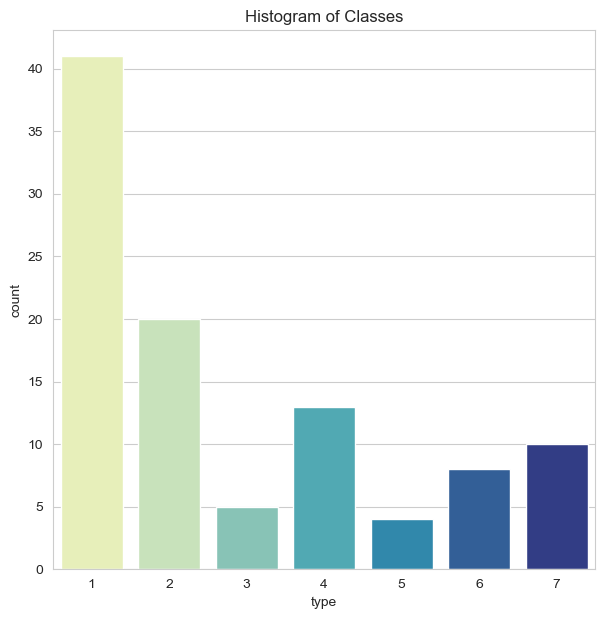

In [11]:
plt.rcParams['figure.figsize'] = (7,7)
sns.countplot(df['type'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Classes")

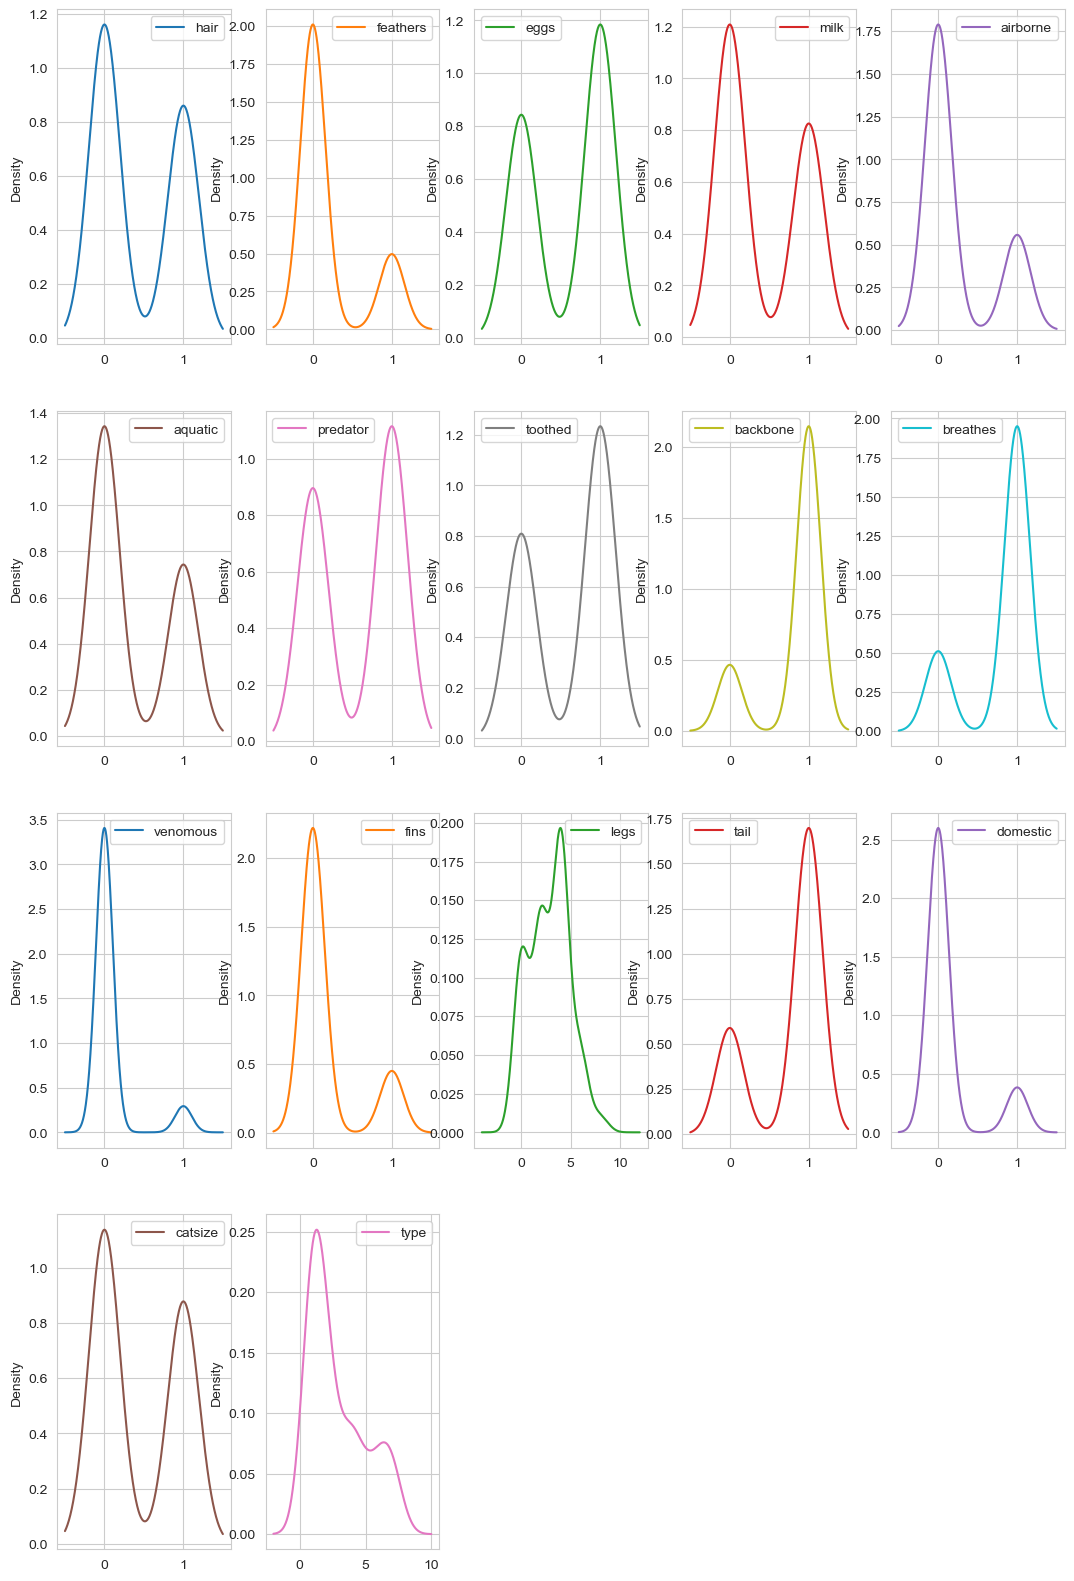

In [12]:
df.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False);
plt.show();

In [13]:
df.drop(columns=['animal name'],inplace=True)

In [14]:
# Defining x and y
x=df.iloc[:,:-1]
y=df['type']

## Model building

In [15]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [16]:
from sklearn.model_selection import train_test_split 

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75,random_state=1)

In [18]:
def predict(model):
  model.fit(xtrain,ytrain)
  ypred=model.predict(xtest)

  print(model.score(xtrain,ytrain))
  print(model.score(xtest,ytest))
  print(classification_report(ytest,ypred))

In [19]:
predict(KNeighborsClassifier(n_neighbors=5))

0.96
0.8846153846153846
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.71      1.00      0.83         5
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         3

    accuracy                           0.88        26
   macro avg       0.63      0.67      0.63        26
weighted avg       0.84      0.88      0.85        26



In [20]:
trainac=[]
testac=[]


for i in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain,ytrain)
  ypred=knn.predict(xtest)
  trainac.append(knn.score(xtrain,ytrain))
  testac.append(knn.score(xtest,ytest))

In [21]:
trainac

[1.0,
 0.9466666666666667,
 0.9466666666666667,
 0.96,
 0.96,
 0.9333333333333333,
 0.92,
 0.9066666666666666,
 0.88,
 0.88,
 0.8933333333333333,
 0.8933333333333333,
 0.88,
 0.88,
 0.88,
 0.8933333333333333,
 0.8933333333333333,
 0.88,
 0.88,
 0.8533333333333334,
 0.8266666666666667,
 0.8,
 0.7866666666666666,
 0.7866666666666666,
 0.7733333333333333,
 0.76,
 0.76,
 0.7466666666666667,
 0.7466666666666667]

In [22]:
testac

[0.9615384615384616,
 0.8846153846153846,
 0.9230769230769231,
 0.9615384615384616,
 0.8846153846153846,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.8076923076923077,
 0.8076923076923077,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461,
 0.7692307692307693,
 0.7692307692307693,
 0.7307692307692307,
 0.7307692307692307]

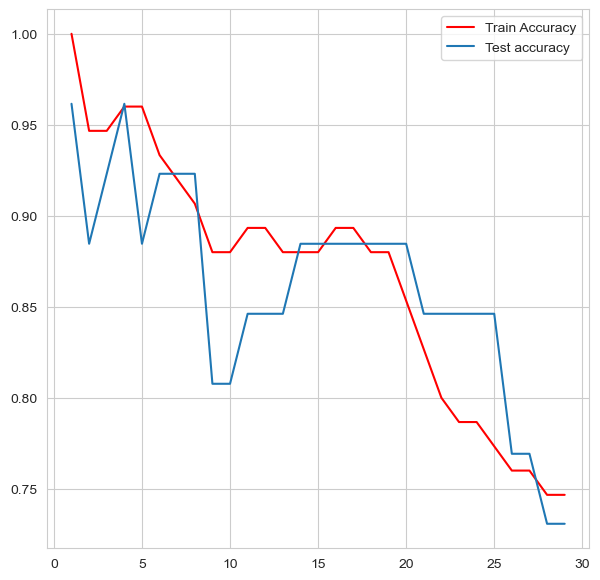

In [23]:
plt.plot(range(1,30),trainac,color='red',label='Train Accuracy')
plt.plot(range(1,30),testac,label='Test accuracy')
plt.xlabel=('K-value')
plt.ylabel=('Accuracy')
plt.legend()

In [24]:
predict(KNeighborsClassifier(n_neighbors=28))

0.7466666666666667
0.7307692307692307
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       0.71      1.00      0.83         5
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3

    accuracy                           0.73        26
   macro avg       0.30      0.43      0.35        26
weighted avg       0.57      0.73      0.64        26

